See Chenyu's paper for time data analysis

In [81]:
import librosa
import librosa.display
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew


In [2]:
#get datasets from all cases, all channels, both normal and abnormal
datapath = r'C:\Users\brech\THESIS_local\ToyADMOS\ToycarCSV.csv'
data_csv = pd.read_csv(datapath)

def find_path_to_wav(full_sample_name):
    for root, dirs, files in os.walk(os.path.dirname(datapath)):
        for name in files:
            if name == full_sample_name:
                path_to_wavFile = os.path.abspath(os.path.join(root, name))
                return path_to_wavFile


def get_sample_waveform_normalised(full_sample_name, start = 0, stop = 11):
    #returns waveform values, cut to seconds going from start to stop
    sample_path = find_path_to_wav(full_sample_name)
    waveform, sample_rate = librosa.load(sample_path, sr= None)
    waveform = waveform[start*sample_rate : stop*sample_rate]
        
    return librosa.util.normalize(waveform)
            
            
data_case1_ch_1_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch1")]
data_case1_ch_1_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch1")]
          
data_case1_ch_2_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch2")]
data_case1_ch_2_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch2")]
          
data_case1_ch_3_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch3")]
data_case1_ch_3_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch3")]
          
data_case1_ch_4_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch4")]
data_case1_ch_4_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case1") & (data_csv["Channel"] == "ch4")]
################################################################
    
data_case2_ch_1_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch1")]
data_case2_ch_1_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch1")]
        
data_case2_ch_2_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch2")]
data_case2_ch_2_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch2")]
        
data_case2_ch_3_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch3")]
data_case2_ch_3_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch3")]
        
data_case2_ch_4_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch4")]
data_case2_ch_4_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case2") & (data_csv["Channel"] == "ch4")]
################################################################
    
data_case3_ch_1_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch1")]
data_case3_ch_1_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch1")]
    
data_case3_ch_2_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch2")]
data_case3_ch_2_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch2")]
    
data_case3_ch_3_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch3")]
data_case3_ch_3_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch3")]
    
data_case3_ch_4_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch4")]
data_case3_ch_4_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case3") & (data_csv["Channel"] == "ch4")]
################################################################
    
data_case4_ch_1_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch1")]
data_case4_ch_1_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch1")]
    
data_case4_ch_2_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch2")]
data_case4_ch_2_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch2")]
    
data_case4_ch_3_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch3")]
data_case4_ch_3_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch3")]
    
data_case4_ch_4_normal = data_csv[(data_csv["norm/ab"] == "normal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch4")]
data_case4_ch_4_abnormal = data_csv[(data_csv["norm/ab"] == "abnormal") & (data_csv["Case"] == "case4") & (data_csv["Channel"] == "ch4")]

Start with time-domain features:

https://devopedia.org/audio-feature-extraction, zie ook paper
Time domain:
Root Mean Square (RMS), kurtosis, skewness, variance, mean, crest factor, shape factor, impulse factor, clearance factor, zero crossing rate, shimmer, amplitude envelope, attack time, auto-correlation coefficients, Energy features
Energy, Entropy, Peak-to-Sidelobe ratio (PSR) from the Hilbert Envelope of the LP Residual, 
Normalized Autocorrelation Peak Strength (NAPS) of Zero frequency filtered signal

Freq domain:
spectrogram
ZCR,Spectral Flux, Spectral Rolloff, Chroma, Log Mel spectrum energy, Harmonic ratio, Modulation spectrum energy, Pitch
Band energy ratio, spectral centroid, Envelope Analysis, Spectral Kurtosis, Short-Time Fourier Transform (STFT), Wavelet Transform, 
Cyclic Spectral Analysis (CSA), MFCC

Time domain: waveform plots

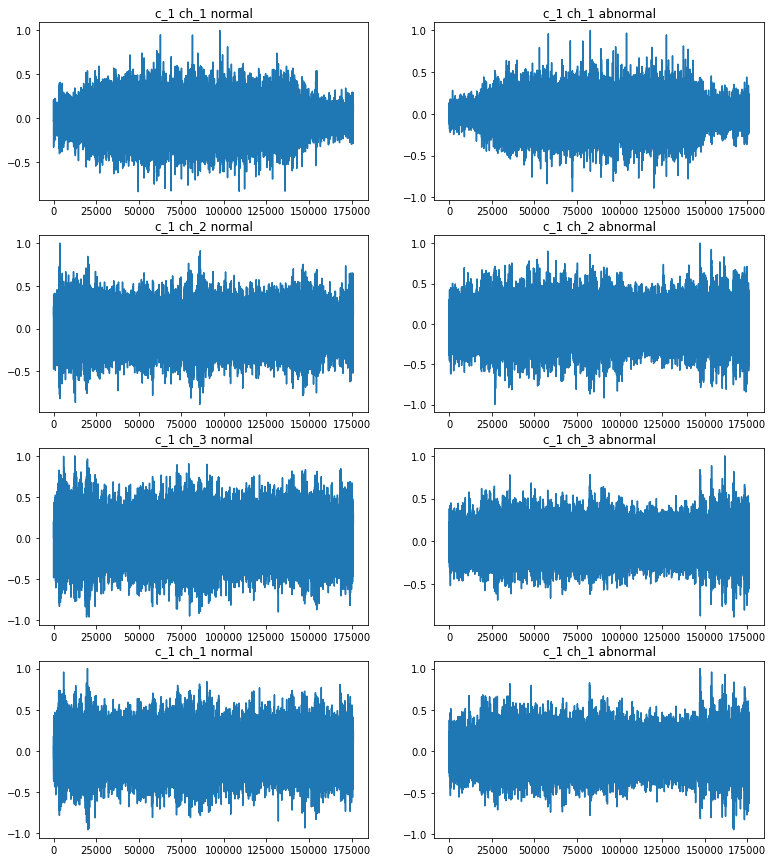

In [3]:
#plot waveform of case 1 all channels, both a normal sample and an abnormal sample
plt.figure(figsize = (13,15))
plt.subplot(4,2,1)
plt.plot(get_sample_waveform_normalised(data_case1_ch_1_normal.iloc()[1][0]))
plt.title("c_1 ch_1 normal")

plt.subplot(4,2,2)
plt.plot(get_sample_waveform_normalised(data_case1_ch_1_abnormal.iloc()[1][0]))
plt.title("c_1 ch_1 abnormal")

plt.subplot(4,2,3)
plt.plot(get_sample_waveform_normalised(data_case1_ch_2_normal.iloc()[1][0]))
plt.title("c_1 ch_2 normal")

plt.subplot(4,2,4)
plt.plot(get_sample_waveform_normalised(data_case1_ch_2_abnormal.iloc()[1][0]))
plt.title("c_1 ch_2 abnormal")

plt.subplot(4,2,5)
plt.plot(get_sample_waveform_normalised(data_case1_ch_3_normal.iloc()[1][0]))
plt.title("c_1 ch_3 normal")

plt.subplot(4,2,6)
plt.plot(get_sample_waveform_normalised(data_case1_ch_3_abnormal.iloc()[1][0]))
plt.title("c_1 ch_3 abnormal")

plt.subplot(4,2,7)
plt.plot(get_sample_waveform_normalised(data_case1_ch_4_normal.iloc()[1][0]))
plt.title("c_1 ch_1 normal")

plt.subplot(4,2,8)
plt.plot(get_sample_waveform_normalised(data_case1_ch_4_abnormal.iloc()[1][0]))
plt.title("c_1 ch_1 abnormal")

plt.show()

Time domain: RMS

get RMS of 1 waveform

get RMS of all normal waveform compared to all abnormal waveform

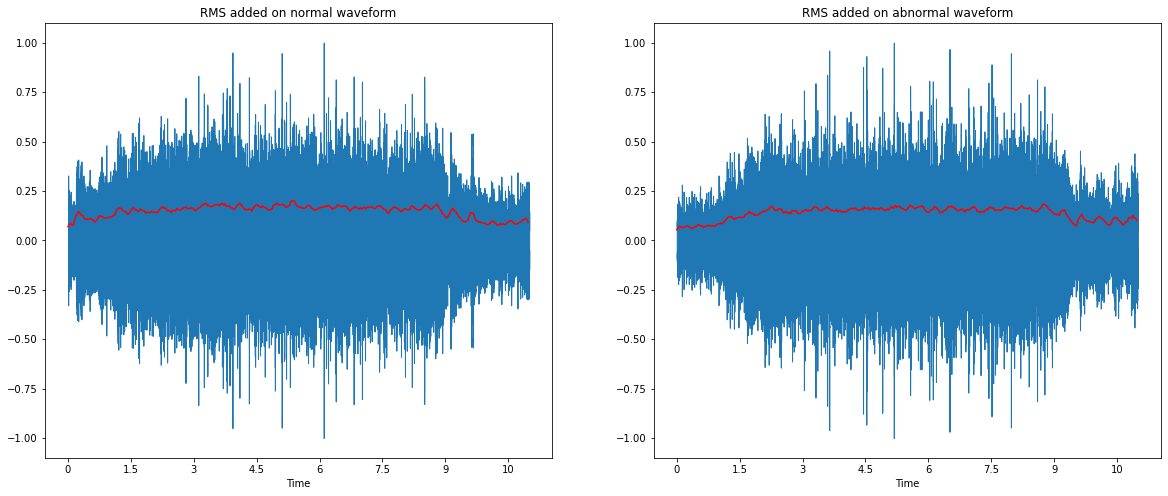

In [4]:
waveform_c1ch1_normal = get_sample_waveform_normalised(data_case1_ch_1_normal.iloc()[1][0])
waveform_c1ch1_abnormal = get_sample_waveform_normalised(data_case1_ch_1_abnormal.iloc()[1][0])
rms_c1ch1_normal = librosa.feature.rms(y = waveform_c1ch1_normal)[0]
rms_c1ch1_abnormal = librosa.feature.rms(y = waveform_c1ch1_abnormal)[0]

frames_c1ch1_norm = range(len(rms_c1ch1_normal))
t_norm = librosa.frames_to_time(frames_c1ch1_norm, sr = 16000)

frames_c1ch1_abnorm = range(len(rms_c1ch1_abnormal))
t_abnorm = librosa.frames_to_time(frames_c1ch1_abnorm, sr = 16000)

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
librosa.display.waveshow(y = waveform_c1ch1_normal, sr = 16000 )
plt.plot(t_norm, rms_c1ch1_normal, color="r")
plt.title("RMS added on normal waveform")

plt.subplot(1,2,2)
librosa.display.waveshow(y = waveform_c1ch1_abnormal, sr = 16000)
plt.plot(t_abnorm, rms_c1ch1_abnormal, color="r")
plt.title("RMS added on abnormal waveform")

plt.show()


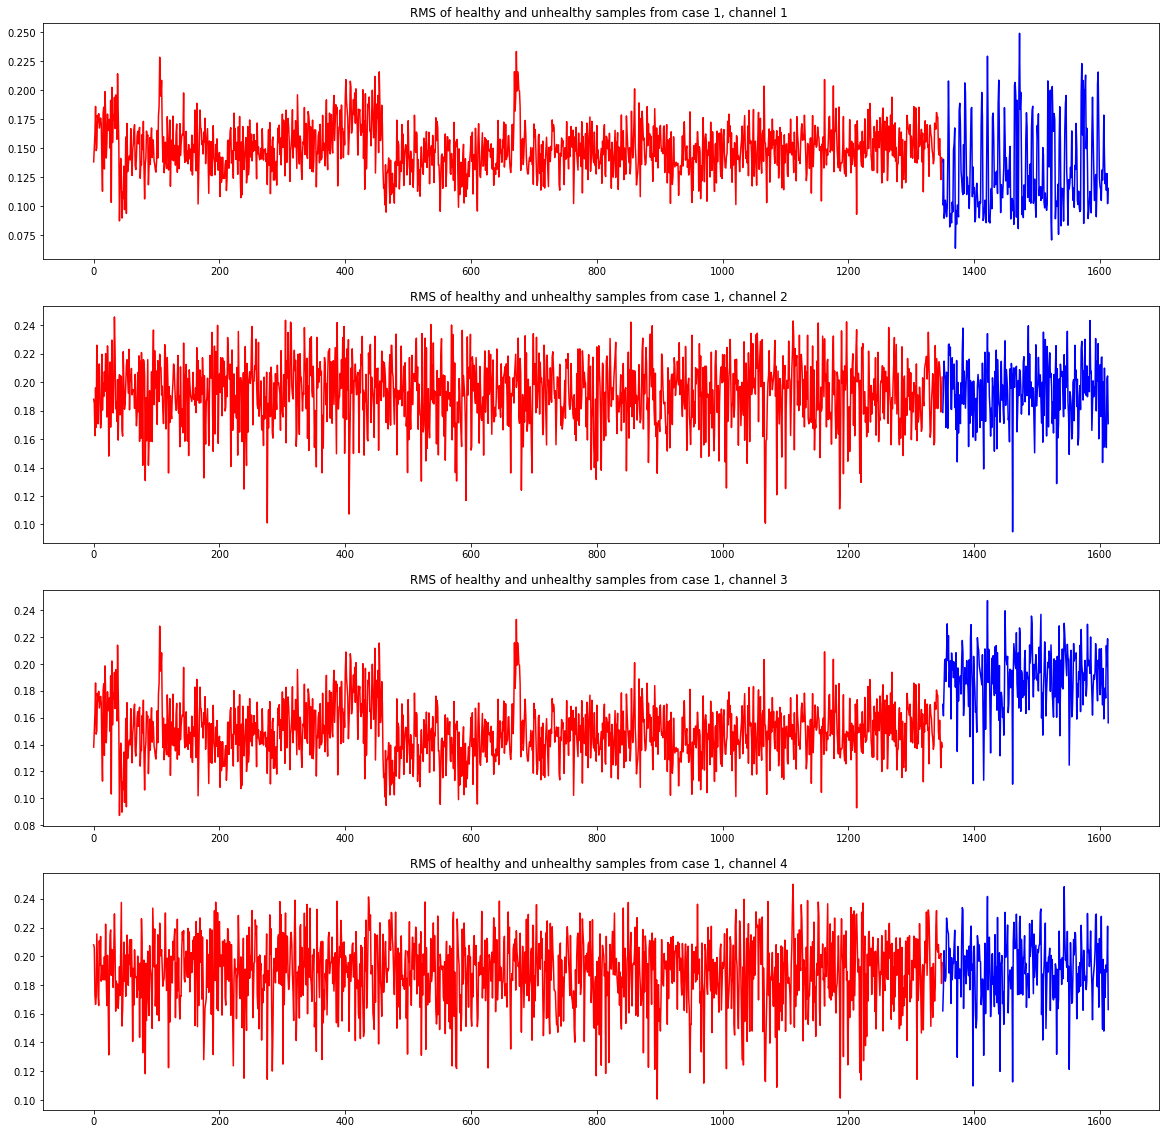

In [5]:
#get rms of all normal samples, compare to abnormal samples
#%% rms for normal data of case 1
rms_normal_case1_ch1 = []
for i in range(len(data_case1_ch_1_normal)):    
    waveform_case1_normal = get_sample_waveform_normalised(data_case1_ch_1_normal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_normal, window=np.ones,center=False, n_fft=len(waveform_case1_normal)))
    rms_normal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_normal))
    rms_normal_case1_ch1.append(rms_normal.item())
   
# #%% rms for abnormal data
rms_abnormal_case1_ch1 = []
for i in range(len(data_case1_ch_1_abnormal)):    
    waveform_case1_abnormal = get_sample_waveform_normalised(data_case1_ch_1_abnormal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_abnormal, window=np.ones,center=False, n_fft=len(waveform_case1_abnormal)))
    rms_abnormal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_abnormal))
    rms_abnormal_case1_ch1.append(rms_abnormal.item())
    
rms_normal_case1_ch2 = []
for i in range(len(data_case1_ch_2_normal)):    
    waveform_case1_normal = get_sample_waveform_normalised(data_case1_ch_2_normal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_normal, window=np.ones,center=False, n_fft=len(waveform_case1_normal)))
    rms_normal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_normal))
    rms_normal_case1_ch2.append(rms_normal.item())
   
# #%% rms for abnormal data
rms_abnormal_case1_ch2 = []
for i in range(len(data_case1_ch_2_abnormal)):    
    waveform_case1_abnormal = get_sample_waveform_normalised(data_case1_ch_2_abnormal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_abnormal, window=np.ones,center=False, n_fft=len(waveform_case1_abnormal)))
    rms_abnormal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_abnormal))
    rms_abnormal_case1_ch2.append(rms_abnormal.item())
    
rms_normal_case1_ch3 = []
for i in range(len(data_case1_ch_3_normal)):    
    waveform_case1_normal = get_sample_waveform_normalised(data_case1_ch_1_normal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_normal, window=np.ones,center=False, n_fft=len(waveform_case1_normal)))
    rms_normal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_normal))
    rms_normal_case1_ch3.append(rms_normal.item())
   
# #%% rms for abnormal data
rms_abnormal_case1_ch3 = []
for i in range(len(data_case1_ch_3_abnormal)):    
    waveform_case1_abnormal = get_sample_waveform_normalised(data_case1_ch_3_abnormal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_abnormal, window=np.ones,center=False, n_fft=len(waveform_case1_abnormal)))
    rms_abnormal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_abnormal))
    rms_abnormal_case1_ch3.append(rms_abnormal.item())
    
rms_normal_case1_ch4 = []
for i in range(len(data_case1_ch_4_normal)):    
    waveform_case1_normal = get_sample_waveform_normalised(data_case1_ch_4_normal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_normal, window=np.ones,center=False, n_fft=len(waveform_case1_normal)))
    rms_normal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_normal))
    rms_normal_case1_ch4.append(rms_normal.item())

# #%% rms for abnormal data
rms_abnormal_case1_ch4 = []
for i in range(len(data_case1_ch_4_abnormal)):    
    waveform_case1_abnormal = get_sample_waveform_normalised(data_case1_ch_4_abnormal.iloc()[i][0])
    S, phase = librosa.magphase(librosa.stft(waveform_case1_abnormal, window=np.ones,center=False, n_fft=len(waveform_case1_abnormal)))
    rms_abnormal = librosa.feature.rms(S=S, frame_length=len(waveform_case1_abnormal))
    rms_abnormal_case1_ch4.append(rms_abnormal.item())
#%% plot rms values'
plt.figure(figsize = (20,20))
plt.subplot(4,1,1)
plt.title(f"RMS of healthy and unhealthy samples from case 1, channel 1 ")
plt.plot(rms_normal_case1_ch1, color="r")
plt.plot(range(len(rms_normal_case1_ch1), len(rms_normal_case1_ch1)+len(rms_abnormal_case1_ch1)), rms_abnormal_case1_ch1, color="b")

plt.subplot(4,1,2)
plt.title(f"RMS of healthy and unhealthy samples from case 1, channel 2 ")
plt.plot(rms_normal_case1_ch2, color="r")
plt.plot(range(len(rms_normal_case1_ch2), len(rms_normal_case1_ch2)+len(rms_abnormal_case1_ch2)), rms_abnormal_case1_ch2, color="b")

plt.subplot(4,1,3)
plt.title(f"RMS of healthy and unhealthy samples from case 1, channel 3 ")
plt.plot(rms_normal_case1_ch3, color="r")
plt.plot(range(len(rms_normal_case1_ch3), len(rms_normal_case1_ch3)+len(rms_abnormal_case1_ch3)), rms_abnormal_case1_ch3, color="b")

plt.subplot(4,1,4)
plt.title(f"RMS of healthy and unhealthy samples from case 1, channel 4 ")
plt.plot(rms_normal_case1_ch4, color="r")
plt.plot(range(len(rms_normal_case1_ch4), len(rms_normal_case1_ch4)+len(rms_abnormal_case1_ch4)), rms_abnormal_case1_ch4, color="b")

plt.show()



%% Time domain indicators
featOut.STD = std(signal);% variance

featOut.SKW = skewness(signal);% skewness
featOut.CF = max(abs(signal))/rms(signal);% crest factor
featOut.SF = rms(signal)/mean(abs(signal));% shape factror
featOut.IF = max(abs(signal))/mean(abs(signal));% impulse factor
featOut.M = mean(signal);% mean
featOut.CLF = max(abs(signal))/(mean(abs(signal).^(1/2))).^2; % clearance factor

Time domain: kurtosis of 2 sample signals 

Kurtosis of case 3 all normal samples compared to abnormal samples

kurtosis normal sample:  0.12902557950693172
kurtosis abnormal sample:  0.5576076774643877


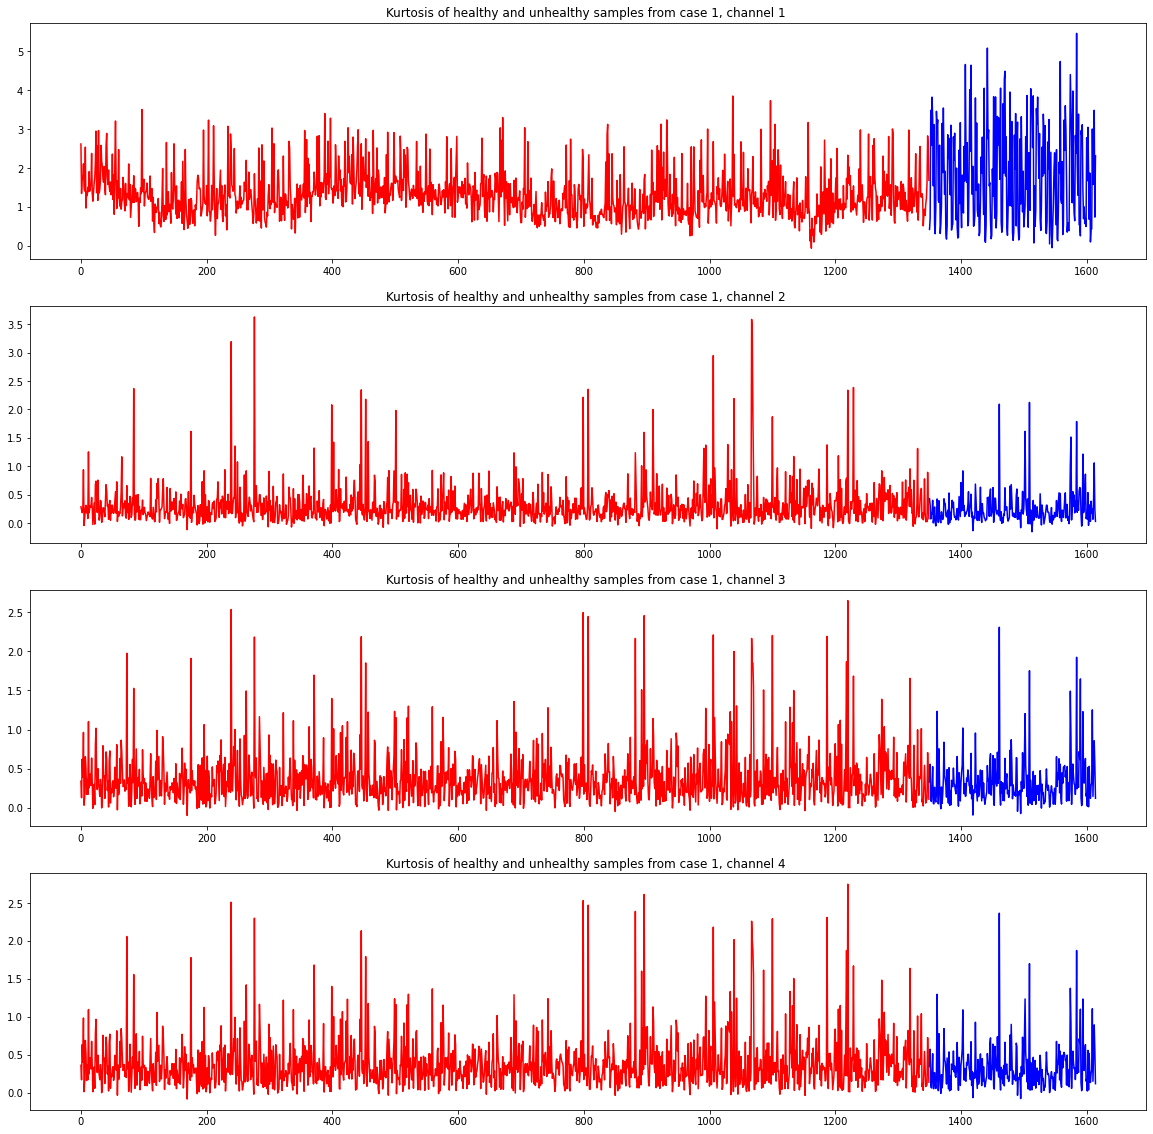

In [79]:
#kurtosis from case 3
"""Een hoge kurtosis wijst op een verdeling met lage kans op extreme uitschieters, vanwege de staartvorm. 
Dit houdt in dat een relatief groot deel van de variantie veroorzaakt wordt door zeldzame extreme waarden. 
Een lage kurtosis wijst op een platte verdeling.  Hier wordt de variantie voornamelijk veroorzaakt door een groter deel minder extreme waarden.
One can say it is a measure of how heavy the tail is compared to a normal distribution.
Higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.
"""
kurtosis_sample_waveform_normal = get_sample_waveform_normalised(data_case3_ch_3_normal.iloc()[1][0])
kurtosis_sample_waveform_abnormal = get_sample_waveform_normalised(data_case3_ch_3_abnormal.iloc()[1][0])

print("kurtosis normal sample: ", kurtosis(kurtosis_sample_waveform_normal))
print("kurtosis abnormal sample: ", kurtosis(kurtosis_sample_waveform_abnormal))
################################################################################################    
kurtosis_ch1_normal_results = []
for i in range(len(data_case3_ch_1_normal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_1_normal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch1_normal_results.append(kurtosis_res)
    
kurtosis_ch2_normal_results = []
for i in range(len(data_case3_ch_2_normal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_2_normal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch2_normal_results.append(kurtosis_res)

kurtosis_ch3_normal_results = []
for i in range(len(data_case3_ch_3_normal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_3_normal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch3_normal_results.append(kurtosis_res)

kurtosis_ch4_normal_results = []
for i in range(len(data_case3_ch_4_normal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_4_normal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch4_normal_results.append(kurtosis_res)


################################################################
kurtosis_ch1_abnormal_results = []
for i in range(len(data_case3_ch_1_abnormal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_1_abnormal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch1_abnormal_results.append(kurtosis_res)
    

kurtosis_ch2_abnormal_results = []
for i in range(len(data_case3_ch_2_abnormal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_2_abnormal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch2_abnormal_results.append(kurtosis_res)

kurtosis_ch3_abnormal_results = []
for i in range(len(data_case3_ch_3_abnormal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_3_abnormal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch3_abnormal_results.append(kurtosis_res)

kurtosis_ch4_abnormal_results = []
for i in range(len(data_case3_ch_4_abnormal)):    
    kurtosis_waveform_case1 = get_sample_waveform_normalised(data_case3_ch_4_abnormal.iloc()[i][0])
    kurtosis_res = kurtosis(kurtosis_waveform_case1)
    kurtosis_ch4_abnormal_results.append(kurtosis_res)
    
plt.figure(figsize = (20,20))
plt.subplot(4,1,1)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 1 ")
plt.plot(kurtosis_ch1_normal_results, color="r")
plt.plot(range(len(kurtosis_ch1_normal_results), len(kurtosis_ch1_normal_results)+len(kurtosis_ch1_abnormal_results)), kurtosis_ch1_abnormal_results, color="b")

plt.subplot(4,1,2)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 2 ")
plt.plot(kurtosis_ch2_normal_results, color="r")
plt.plot(range(len(kurtosis_ch2_normal_results), len(kurtosis_ch2_normal_results)+len(kurtosis_ch2_abnormal_results)), kurtosis_ch2_abnormal_results, color="b")

plt.subplot(4,1,3)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 3 ")
plt.plot(kurtosis_ch3_normal_results, color="r")
plt.plot(range(len(kurtosis_ch3_normal_results), len(kurtosis_ch3_normal_results)+len(kurtosis_ch3_abnormal_results)), kurtosis_ch3_abnormal_results, color="b")

plt.subplot(4,1,4)
plt.title(f"Kurtosis of healthy and unhealthy samples from case 3, channel 4 ")
plt.plot(kurtosis_ch4_normal_results, color="r")
plt.plot(range(len(kurtosis_ch4_normal_results), len(kurtosis_ch4_normal_results)+len(kurtosis_ch4_abnormal_results)), kurtosis_ch4_abnormal_results, color="b")

plt.show()


    
    

Time Domain: Skewness

Skewness measures a signal's asymmetrical spread about its mean value.

In [85]:
#skewness of case 4, all channels
"""
For normally distributed data, the skewness should be about zero
"""
kurtosis_sample_waveform_normal = get_sample_waveform_normalised(data_case3_ch_3_normal.iloc()[1][0])
kurtosis_sample_waveform_abnormal = get_sample_waveform_normalised(data_case3_ch_3_abnormal.iloc()[1][0])

print("skewness of normal/abnormal sample", skew(kurtosis_sample_waveform_normal), skew(kurtosis_sample_waveform_abnormal))

avg_skewness_normal = []
for element in [data_case4_ch_1_normal,data_case4_ch_2_normal,data_case4_ch_3_normal,data_case4_ch_4_normal]:
    avg_skewness_normal_ch = []
    for i in range(len(element)):    
        waveform_normal = get_sample_waveform_normalised(element.iloc()[i][0])
        skew_normal = skew(waveform_normal)
        avg_skewness_normal_ch.append(skew_normal)
        
    avg_skewness_normal.append(np.average(avg_skewness_normal_ch))
    

avg_skewness_abnormal = []
for element in [data_case4_ch_1_abnormal,data_case4_ch_2_abnormal,data_case4_ch_3_abnormal,data_case4_ch_4_abnormal]:
    avg_skewness_abnormal_ch = []
    for i in range(len(element)):    
        waveform_abnormal = get_sample_waveform_normalised(element.iloc()[i][0])
        skew_abnormal = skew(waveform_abnormal)
        avg_skewness_abnormal_ch.append(skew_abnormal)
        
    avg_skewness_normal.append(np.average(avg_skewness_abnormal_ch))
    
print("average skewness of case 4, all channels, norm/abnorm", avg_skewness_normal,avg_skewness_normal)


0.003488599559764605 0.028889455787519402


In [86]:
avg_skewness_normal

[-0.07676821837705429,
 0.0037080744760418266,
 0.0009694359200157099,
 0.00010946887392584651]

Frequency domain: spectrogram

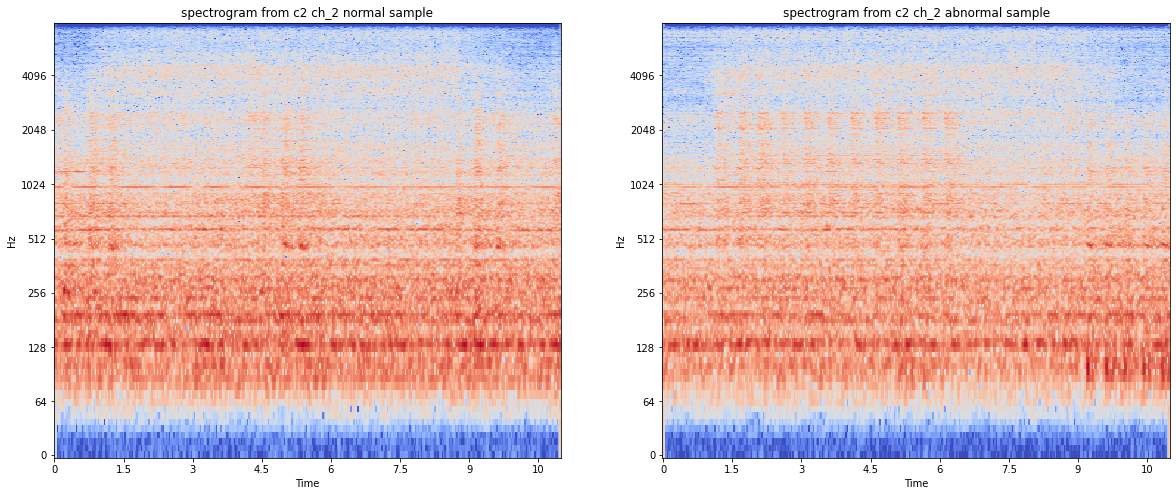

In [7]:
#plot spectogram
waveform_normal = get_sample_waveform_normalised(data_case2_ch_2_normal.iloc()[1][0])
waveform_abnormal = get_sample_waveform_normalised(data_case2_ch_2_abnormal.iloc()[1][0])
D_normal = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_normal)))
D_abnormal = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_abnormal)))

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
librosa.display.specshow(D_normal, y_axis='log', x_axis='time', sr=16000)
plt.title("spectrogram from c2 ch_2 normal sample")

plt.subplot(1,2,2)
librosa.display.specshow(D_abnormal, y_axis='log', x_axis='time', sr=16000)
plt.title("spectrogram from c2 ch_2 abnormal sample")

plt.show()


Frequency domain: frequency magnitude spectrum

[4.22983255 4.3908657  4.47764862 ... 4.53566357 4.47764862 4.3908657 ] 176000
[4.91178941 4.88362678 4.97816001 ... 4.77224566 4.97816001 4.88362678] 176000


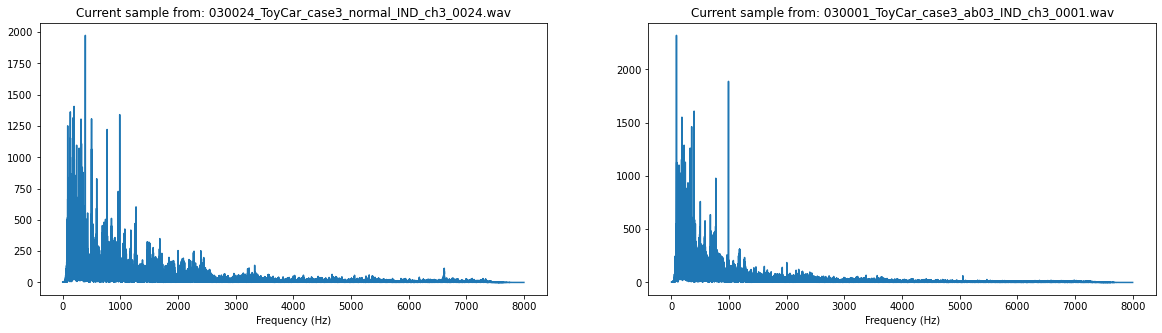

In [75]:
#frequency magnitude spectrum of 2 samples
waveform_c3_ch3_normal = get_sample_waveform_normalised(data_case3_ch_3_normal.iloc()[3][0])
waveform_c3_ch3_abnormal = get_sample_waveform_normalised(data_case3_ch_3_abnormal.iloc()[2][0])

#plot magnitude spectrum
def freq_mag_spectrum(signal, sr):
    Y = np.fft.fft(signal)
    Y_mag = np.absolute(Y)
    freq = np.linspace(0, sr, len(Y_mag))    
    print(Y_mag, len(Y_mag))
    return freq, Y_mag

freq_norm, Y_mag_norm = freq_mag_spectrum(waveform_c3_ch3_normal, 16000)
freq_abnorm, Y_mag_abnorm = freq_mag_spectrum(waveform_c3_ch3_abnormal, 16000)


plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(freq_norm[0:round(len(freq_norm)/2)],Y_mag_norm[0:round(len(freq_norm)/2)])
plt.xlabel('Frequency (Hz)')
plt.title("Current sample from: "+ str(data_case3_ch_3_normal.iloc()[3][0]))

plt.subplot(1,2,2)
plt.plot(freq_abnorm[0:round(len(freq_abnorm)/2)],Y_mag_abnorm[0:round(len(freq_abnorm)/2)])
plt.xlabel('Frequency (Hz)')
plt.title("Current sample from: "+ str(data_case3_ch_3_abnormal.iloc()[2][0]))

plt.show()

980


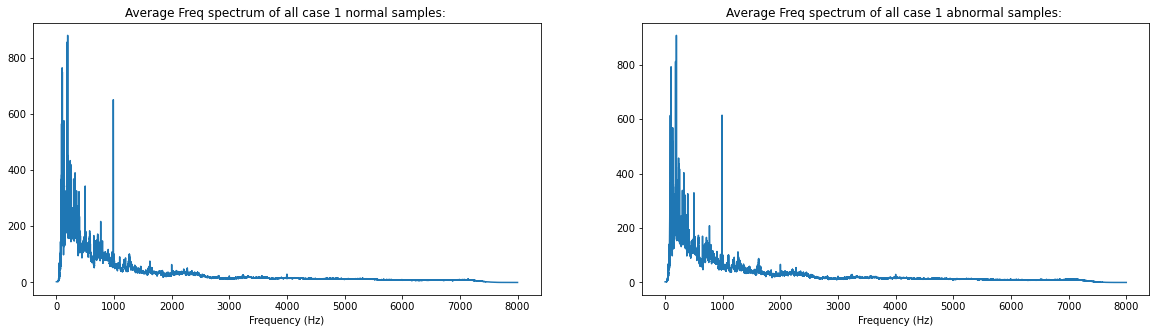

In [67]:
#average frequency spectrum of ALL normal samples compared to all abnormal samples
case1_Y_mag_normal = np.empty((176000))
case1_normal_data = pd.concat([data_case1_ch_1_normal,data_case1_ch_2_normal, data_case1_ch_3_normal, data_case1_ch_4_normal])

for i in range(len(case1_normal_data)):    
    waveform_case1 = get_sample_waveform_normalised(case1_normal_data.iloc()[i][0])
    freq_norm, Y_mag_norm = freq_mag_spectrum(waveform_case1, 16000)
    case1_Y_mag_normal = np.add(case1_Y_mag_normal, Y_mag_norm)

case1_Y_mag_normal = np.divide(case1_Y_mag_normal,len(case1_normal_data))

################################################################
case1_Y_mag_abnormal = np.empty((176000))
case1_abnormal_data = pd.concat([data_case1_ch_1_abnormal,data_case1_ch_2_abnormal, data_case1_ch_3_abnormal, data_case1_ch_4_abnormal])

for i in range(len(case1_abnormal_data)):    
    waveform_case1 = get_sample_waveform_normalised(case1_abnormal_data.iloc()[i][0])
    freq_norm, Y_mag_abnorm = freq_mag_spectrum(waveform_case1, 16000)
    case1_Y_mag_abnormal = np.add(case1_Y_mag_abnormal, Y_mag_abnorm)
    
case1_Y_mag_abnormal = np.divide(case1_Y_mag_abnormal,len(case1_abnormal_data))

#count number of frequencies larger than threshold, maybe useful for size of latent space in autoencoder
nb_large_freq = (case1_Y_mag_normal[0:round(len(freq_norm)/2)] > 250).sum()
print(nb_large_freq)

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(freq_norm[0:round(len(freq_norm)/2)], case1_Y_mag_normal[0:round(len(freq_norm)/2)])
plt.xlabel('Frequency (Hz)')
plt.title("Average Freq spectrum of all case 1 normal samples: ")

plt.subplot(1,2,2)
plt.plot(freq_abnorm[0:round(len(freq_abnorm)/2)],case1_Y_mag_abnormal[0:round(len(freq_abnorm)/2)])
plt.xlabel('Frequency (Hz)')
plt.title("Average Freq spectrum of all case 1 abnormal samples: ")

plt.show()

In [77]:
nb_large_freq = (case1_Y_mag_normal[0:round(len(freq_norm)/2)] > 850).sum()
print(nb_large_freq)

2
